In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from KNN import NearestNeighborRegressor
import math

In [106]:
# Use csv reader, pandas didn't seem to work, probably because of the lack of column names.
with open('MNIST-5-6-Subset.txt') as csvfile:
    X = csv.reader(csvfile, delimiter=' ')
    X = [row for row in X if row]
# CSV reader includes an empty element because there is a "free" delimiter in the end, delete it
del X[0][-1]
X = np.array(X, dtype=float)
# Reshape the array such that we have the pixels together in one 2d array for each picture
X = X.reshape((1877, 28, 28)).swapaxes(1,2)

# Do the same with the labels
with open("MNIST-5-6-Subset-Labels.txt") as csvfile:
    Y = csv.reader(csvfile, delimiter=' ')
    Y = [row for row in Y if row]
del Y[0][-1]
Y = np.array(Y, dtype=float)
Y = Y.T


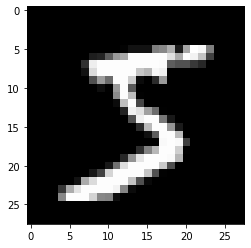

In [107]:
# Check that the first image looks right
plt.imshow(X[0], cmap='gray')

In [108]:
# Copy the data so we don't have to load it again if we accidentally change it
X_train = X[:100].copy()
Y_train = Y[:100].copy()

In [109]:
# Fit my custom nearest neighbor regression model
predictor = NearestNeighborRegressor()
predictor.fit(X_train, Y_train)

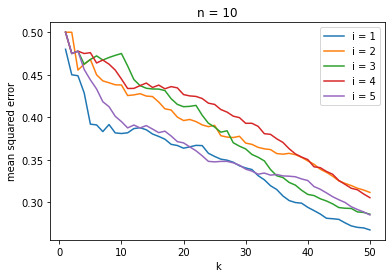

<Figure size 432x288 with 0 Axes>

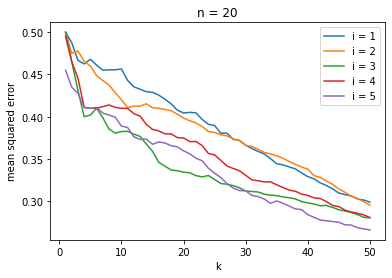

<Figure size 432x288 with 0 Axes>

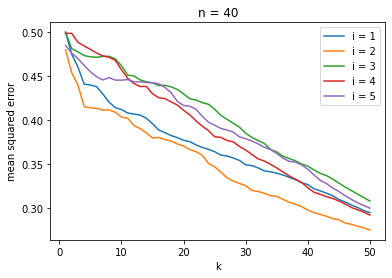

<Figure size 432x288 with 0 Axes>

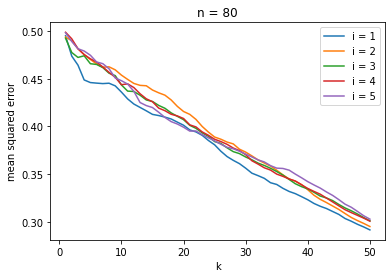

<Figure size 432x288 with 0 Axes>

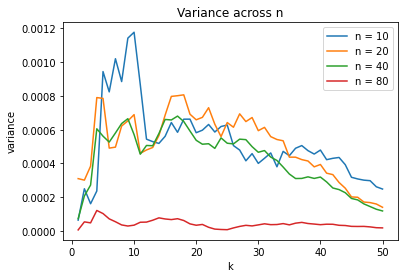

<Figure size 432x288 with 0 Axes>

In [110]:
# The intervals given. Naming could be better
i = np.arange(1, 6)
n = np.array([10, 20, 40, 80])
K = np.arange(1, 51)

# List that holds the variance we need
vari = []
for j in n:
    plt.figure()
    errors = []
    for k in i:
        X_test = X[100 + k * j:100 + (k + 1) * j]
        Y_test = Y[100 + k * j:100 + (k + 1) * j]
        error = [predictor.error(X_test, Y_test, N) for N in K]
        errors.append(error)
        plt.plot(K, error, label=f"i = {k}")
    vari.append(np.var(errors, axis=0))
    plt.title(f"n = {j}")
    plt.xlabel('k')
    plt.ylabel('mean squared error')
    plt.legend()
    plt.show()
    plt.savefig(f"fig{j}.png", bbox_inches='tight')

plt.figure()
for q, var in enumerate(vari):
    plt.plot(K, var, label=f"n = {n[q]}")
plt.title("Variance across n")
plt.legend()
plt.xlabel('k')
plt.ylabel('variance')
plt.show()
plt.savefig("fig5.pdf")

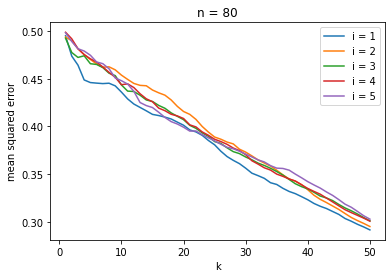

In [111]:
# This code snippet is almost identical to the previous task
n = 80
i = np.arange(1, 6)

for k in i:
    X_test = X[100 + k * n:100 + (k + 1) * n]
    Y_test = Y[100 + k * n:100 + (k + 1) * n]
    error = [predictor.error(X_test, Y_test, N) for N in K]
    plt.plot(K, error, label=f"i = {k}")
plt.title(f"n = {j}")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

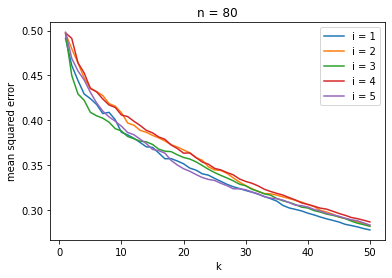

In [112]:
# Do it all again with corruption added
with open('MNIST-5-6-Subset-Light-Corruption.txt') as csvfile:
    X = csv.reader(csvfile, delimiter=' ')
    X = [row for row in X if row]
del X[0][-1]
X = np.array(X, dtype=float)
X = X.reshape((1877, 28, 28)).swapaxes(1,2)

X_train = X[:100]
predictor.fit(X_train, Y_train)

for k in i:
    X_test = X[100 + k * n:100 + (k + 1) * n]
    Y_test = Y[100 + k * n:100 + (k + 1) * n]
    error = [predictor.error(X_test, Y_test, N) for N in K]
    plt.plot(K, error, label=f"i = {k}")
plt.title(f"n = {j}")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

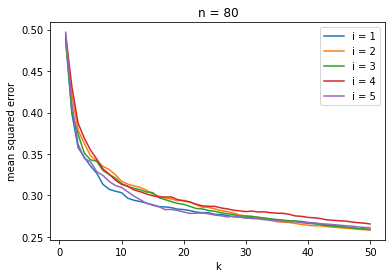

In [113]:
with open('MNIST-5-6-Subset-Moderate-Corruption.txt') as csvfile:
    X = csv.reader(csvfile, delimiter=' ')
    X = [row for row in X if row]
del X[0][-1]
X = np.array(X, dtype=float)
X = X.reshape((1877, 28, 28)).swapaxes(1,2)

X_train = X[:100]
predictor.fit(X_train, Y_train)

for k in i:
    X_test = X[100 + k * n:100 + (k + 1) * n]
    Y_test = Y[100 + k * n:100 + (k + 1) * n]
    error = [predictor.error(X_test, Y_test, N) for N in K]
    plt.plot(K, error, label=f"i = {k}")
plt.title(f"n = {j}")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

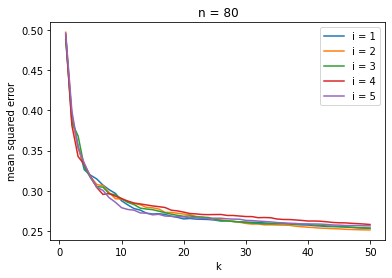

In [114]:
with open('MNIST-5-6-Subset-Heavy-Corruption.txt') as csvfile:
    X = csv.reader(csvfile, delimiter=' ')
    X = [row for row in X if row]
del X[0][-1]
X = np.array(X, dtype=float)
X = X.reshape((1877, 28, 28)).swapaxes(1,2)

X_train = X[:100]
predictor.fit(X_train, Y_train)

for k in i:
    X_test = X[100 + k * n:100 + (k + 1) * n]
    Y_test = Y[100 + k * n:100 + (k + 1) * n]
    error = [predictor.error(X_test, Y_test, N) for N in K]
    plt.plot(K, error, label=f"i = {k}")
plt.title(f"n = {j}")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

In [118]:
# Defines the Linear Regression model
def LinReg(x: np.ndarray, t: np.ndarray) -> np.ndarray:
    t = np.array(t).reshape((len(t), 1))
    ones = np.ones((x.shape[0], 1))
    x = x.reshape((len(x), 1))
    x = np.concatenate((x, ones), axis=1)

    return np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), t)

In [119]:
data = np.loadtxt("PCB.dt", delimiter="\t")

X = data[:, 0]
Y = data[:, 1]

In [120]:
# Apply linear regression, remember to natural log the targets
w = LinReg(X, np.log(Y))
print(f"b = {w[-1][0]}")
print(f"a = {w[0][0]}")

b = 0.031472469714475926
a = 0.2591282395640716


In [121]:
# Prediction for the exponential linear model we made
def predict(x: np.ndarray) -> float:
    x = np.array(x)
    ones = np.ones(x.shape)
    x = np.concatenate((x, ones))
    lin = np.dot(w.T, x)
    return np.exp(lin)

# Function to compute MSE
def MSE(y, y_pred):
    y_pred = y_pred.reshape((len(y_pred), 1))
    y = y.reshape((len(y), 1))
    return np.mean((y - y_pred)**2)

# Function for R_squared
def R_squared(y, y_pred):
    y_pred = y_pred.reshape((len(y_pred), 1))
    y = y.reshape((len(y), 1))
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

In [122]:
# Make a prediction for each x and compute MSE
Y_pred = np.array([predict(x) for x in X.reshape((len(X), 1))])
MSError = MSE(Y, Y_pred)
print(f"MSE = {MSError}")

MSE = 34.83556116722041


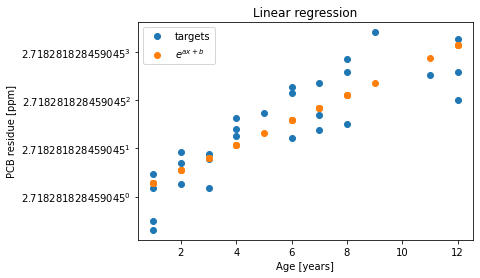

In [123]:
plt.plot(X, Y, 'o', label="targets")
plt.plot(X, Y_pred, 'o', label="$e^{ax+b}$")
plt.legend()
plt.title("Linear regression")
plt.xlabel("Age [years]")
plt.ylabel("PCB residue [ppm]")
plt.yscale('log', base=np.e)

In [124]:
# Coefficient of determination
RS = R_squared(Y, Y_pred)
print(RS)

0.35701357316098525


In [129]:
# Same linear regression, but we remember to apply sqrt of x
w_sq = LinReg(np.sqrt(X), np.log(Y))
print(f"b = {w_sq[-1][0]}")
print(f"a = {w_sq[0][0]}")

b = -1.1947508236636386
a = 1.1986063028078142


In [130]:
# New prediction function. Only necessary since i didn't include w as input
# If i did, could reuse old function
def predict_sq(x: np.ndarray) -> float:
    x = np.sqrt(x)
    x = np.array(x)
    ones = np.ones(x.shape)
    x = np.concatenate((x, ones))
    lin = np.dot(w_sq.T, x)
    return np.exp(lin)

In [132]:
Y_pred_sq = np.array([predict_sq(x) for x in X.reshape((len(X), 1))])
MSError_sq = MSE(Y, Y_pred_sq)
print(f"MSE = {MSError_sq}")

MSE = 28.084390174944335


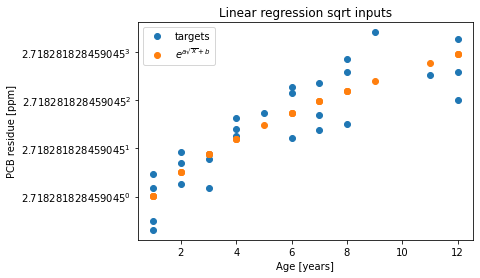

In [133]:
plt.plot(X, Y, 'o', label="targets")
plt.plot(X, Y_pred_sq, 'o', label="$e^{a\sqrt{x}+b}$")
plt.legend()
plt.title("Linear regression sqrt inputs")
plt.xlabel("Age [years]")
plt.ylabel("PCB residue [ppm]")
plt.yscale('log', base=np.e)

In [134]:
R_sq = R_squared(Y, Y_pred_sq)
print(R_sq)

0.4816250669292417
